#Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

#lOADING THE MINST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
type(X_train)


numpy.ndarray

In [4]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

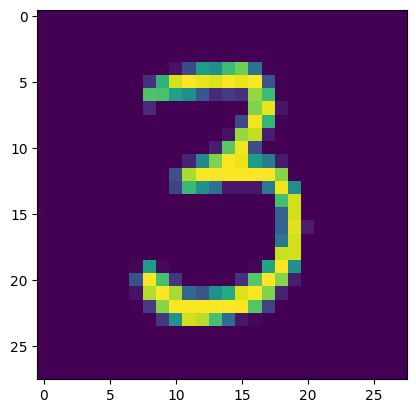

3


In [6]:
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

Image Labels

In [7]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [8]:
#unique values in Y_tain
print(np.unique(Y_test))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
#scaling the values

X_train = X_train/255
X_test = X_test/255

In [10]:
#printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#Building the nn

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [12]:
#compiling the nn
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
#training the nn
model.fit(X_train, Y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2910 - accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1338 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1000 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0803 - accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0664 - accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0577 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0382 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

#Accuarcy on test data


In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9747
0.9746999740600586


In [15]:
print(X_test.shape)

(10000, 28, 28)


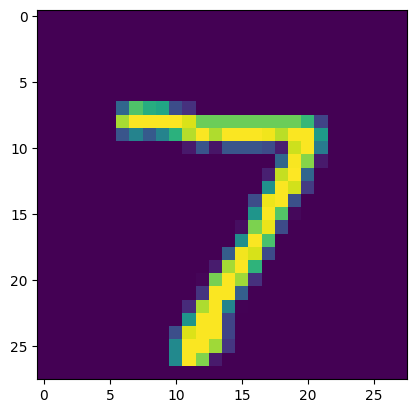

In [16]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [17]:
print(Y_test[0])

7


In [18]:
Y_pred = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[2.0175293e-02 3.7272803e-03 9.1825891e-01 9.0710819e-01 9.5738187e-06
 2.9581326e-01 1.2184692e-08 9.9999970e-01 2.7615054e-02 3.3557487e-01]


In [21]:
# converting the prediction probablities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [22]:
#converting the prediction probabilities to class label for all
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)


In [24]:
print(conf_mat)

tf.Tensor(
[[ 962    0    3    1    2    4    5    0    2    1]
 [   0 1127    1    0    0    1    2    0    4    0]
 [   1    0 1017    4    2    0    0    5    3    0]
 [   1    1   10  964    0   27    0    4    3    0]
 [   0    0    7    1  955    0    4    3    0   12]
 [   1    0    0    2    1  878    5    0    2    3]
 [   2    2    2    0    4    7  941    0    0    0]
 [   0    2   12    3    1    0    0 1001    1    8]
 [   2    0    5   12    5   15    3    2  924    6]
 [   1    2    0    5    9    6    0    5    3  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

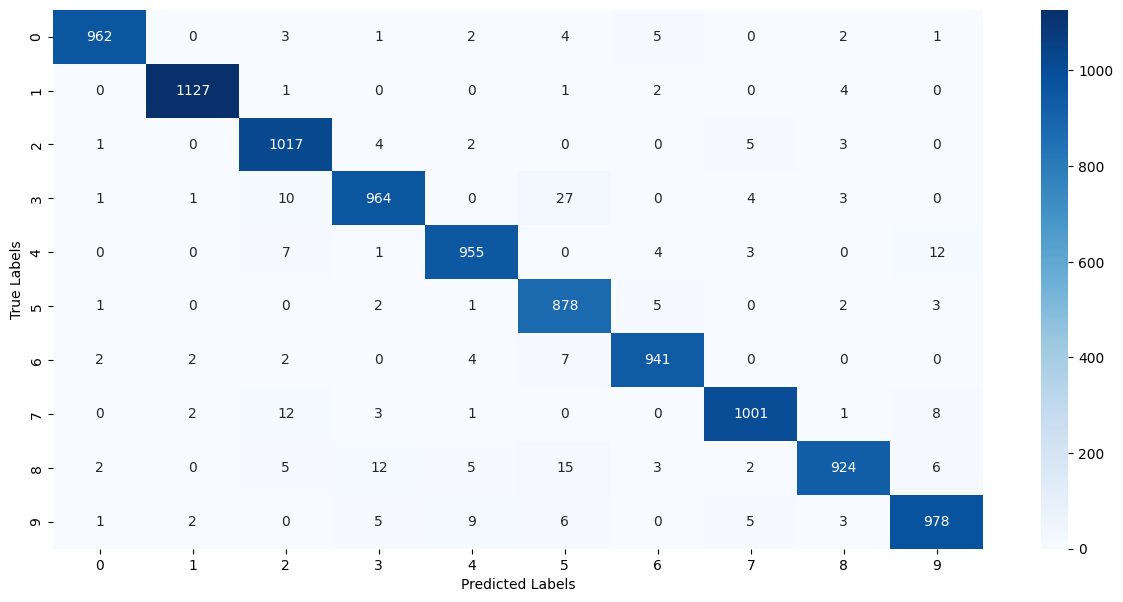

In [25]:
plt.figure(figsize =(15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


#Building a Predictive System

In [27]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)


In [28]:
type(input_image)

numpy.ndarray

In [29]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


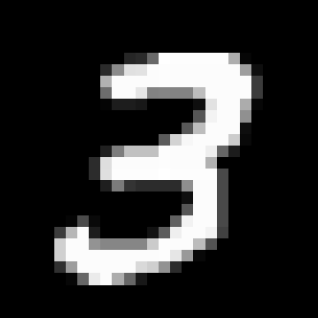

In [30]:
cv2_imshow(input_image)

In [31]:
input_image.shape

(318, 318, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
input_image_resize = cv2.resize(grayscale,(28, 28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])


In [41]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 43ms/step
[[3.8979420e-07 2.8587067e-03 4.4401102e-02 1.0000000e+00 1.5479676e-08
  9.4226396e-01 3.2438027e-15 3.2217869e-07 2.6633060e-01 9.9698257e-01]]


In [42]:
input_pred_label = np.argmax(input_prediction)

In [43]:
print(input_pred_label)

3


#Predictive System

Path of the image to be predicted:/content/MNIST_digit.png


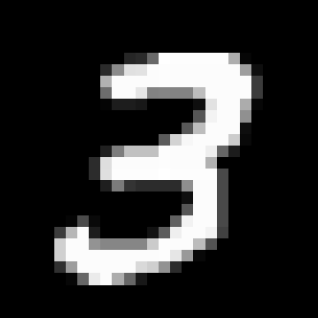

1/1 [==============================] - 0s 22ms/step
The Handwritten digit is recognised as 3


In [46]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten digit is recognised as', input_pred_label)